<a href="https://colab.research.google.com/github/mdave0905/EE/blob/main/EE_Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
movie_reviews = pd.read_csv("drive/MyDrive/IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [ ]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

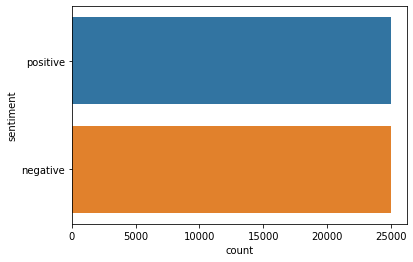

In [ ]:
import seaborn as sns

sns.countplot(y='sentiment', data=movie_reviews)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[0])

[9, 43, 786, 2121, 524, 299, 1, 104, 1860, 1989, 4281, 2, 782, 4786, 9, 1, 224, 1, 77, 763, 51, 49, 17, 97, 3, 1, 24, 1968, 98, 31, 23, 32, 116, 1101, 9, 6, 5, 2323, 1163, 4, 449, 43, 540, 4, 88, 28, 20, 37, 892, 397, 13, 1, 154, 4, 2935, 22, 4318, 18, 2897, 9, 42, 71, 218, 69, 123, 7, 76, 3100, 193, 18, 232, 2, 1, 427, 198, 4888, 147, 19, 60, 24, 13, 70, 358, 299, 16, 15, 6, 198, 25, 302, 9, 11, 1, 1820, 112, 413, 2, 11, 1, 1651, 562, 67, 419, 373, 82, 114, 43, 110, 361, 28, 33, 15, 41, 10, 88, 441, 13, 357, 1145, 59, 7, 1, 460, 214, 992, 4, 4124, 7, 174, 3, 32, 433, 680, 607, 9, 66, 227, 233, 107, 830, 33, 169, 27, 217, 9, 1, 423, 360, 53, 3696, 273, 157, 1672, 187, 5, 1, 711, 1904, 1, 1177, 3, 2838, 3672, 1652, 2, 144, 147, 225, 3, 203, 320, 2, 147, 1052, 14, 85, 3, 131, 2790, 15, 152, 95, 3, 1, 3974, 299, 8, 12, 975, 33, 1, 485, 2567, 242, 66, 72, 104, 104, 678, 57, 80, 66, 148, 1331, 4, 223, 131, 20, 4319, 29, 137, 205, 1123, 11, 4341, 29, 2276, 2, 7, 8, 5, 438, 11, 610, 3, 1, 703

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 120

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('drive/MyDrive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(tf.keras.layers.LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=2, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
250/250 - 102s - loss: 0.5876 - acc: 0.6825 - val_loss: 0.4832 - val_acc: 0.7735
Epoch 2/20
250/250 - 99s - loss: 0.4581 - acc: 0.7916 - val_loss: 0.4878 - val_acc: 0.7551
Epoch 3/20
250/250 - 99s - loss: 0.3909 - acc: 0.8248 - val_loss: 0.3652 - val_acc: 0.8422
Epoch 4/20
250/250 - 99s - loss: 0.3579 - acc: 0.8420 - val_loss: 0.3428 - val_acc: 0.8524
Epoch 5/20
250/250 - 99s - loss: 0.3391 - acc: 0.8523 - val_loss: 0.3295 - val_acc: 0.8584
Epoch 6/20
250/250 - 99s - loss: 0.3212 - acc: 0.8614 - val_loss: 0.3572 - val_acc: 0.8595
Epoch 7/20
250/250 - 99s - loss: 0.3037 - acc: 0.8689 - val_loss: 0.3283 - val_acc: 0.8625
Epoch 8/20
250/250 - 99s - loss: 0.2843 - acc: 0.8793 - val_loss: 0.3153 - val_acc: 0.8656
Epoch 9/20
250/250 - 99s - loss: 0.2667 - acc: 0.8879 - val_loss: 0.3224 - val_acc: 0.8712
Epoch 10/20
250/250 - 99s - loss: 0.2494 - acc: 0.8976 - val_loss: 0.3334 - val_acc: 0.8624
Epoch 11/20
250/250 - 99s - loss: 0.2374 - acc: 0.9036 - val_loss: 0.3468 - val_acc: 0.8

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5467923283576965
Test Accuracy: 0.8490999937057495


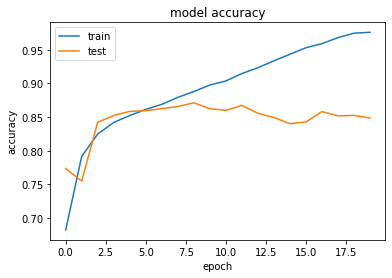

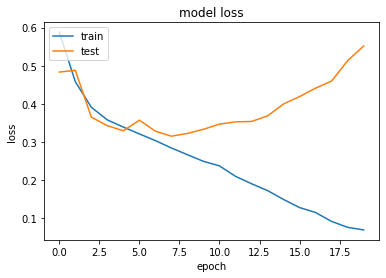

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()